<a href="https://colab.research.google.com/github/ricardogarcia42/Final_Proyect_ML_IA/blob/main/Model_prediction_for_loan_status.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

Se procede a cargar dataset y procesamiento

In [2]:
data = pd.read_csv('loans.csv')

In [3]:
df = pd.DataFrame(data=data) #Gather the dataset in a dataframe for better manipulation
type(df)

pandas.core.frame.DataFrame

In the next visualization take a close look at the columns, in an excel file in the repository I will leave to you the explanation of each column

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.shape #number of rows and columns

(614, 13)

In [6]:
data.info() #lets take a look at what type of data we will handdle

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.isnull().sum() #lets take a look at the missing data

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

It is important to look of the items missing, it will give an advance of how good it the data set and decide whcich values are relevant and which we can get rid off. 

In [8]:
df.describe() #standard deveation and metrics of the numerical data in the dataset

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Data engineering

In [9]:
df.fillna(df.mean(), inplace=True) #we replace the numerical values with the average value of the column where it is Nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [10]:
#Here we will handle the missing values
df = df.dropna()

In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
#lets convert the Yes o No fot the Loan_Status column with Y=1, N=0. Replace documentation https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html
df.replace({"Loan_Status":{"N":0, 'Y':1}}, inplace=True)
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [13]:
df['Dependents'].value_counts() #we take a look at the values of how many people depend of the applicants income. 3+ is not valid

0     319
1      95
2      94
3+     46
Name: Dependents, dtype: int64

In [14]:
df.replace({"Dependents":{"3+":3}}, inplace=True) #replace of 3+ to only 3
df['Dependents'].value_counts()

0    319
1     95
2     94
3     46
Name: Dependents, dtype: int64

Visualization for the analisis

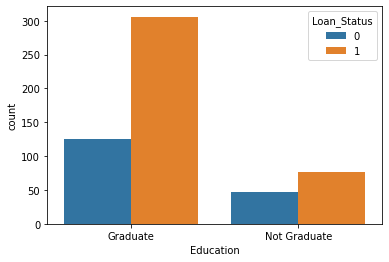

In [15]:
#the visualization will show us if the variables have some correlation between them 
sb.countplot(x='Education',hue='Loan_Status',data=df) #between the education and loan status
#Remember that the loan status is no=0 and yes=1

From the above graph we can see that if the person has graduated there is more possibility for it to get a loan

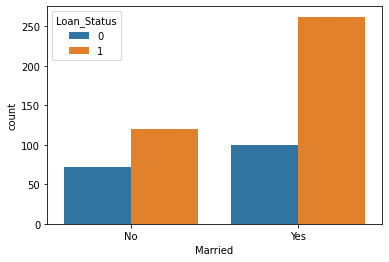

In [16]:
sb.countplot(x='Married',hue='Loan_Status',data=df)

Freom the above graph we can see that if a person is married it is more likely for it to get the loan approved. 


In [17]:
#for the variables that are still in text format, we will change them to 1 or 0 so we can categorize them easier. 
df.replace({"Married":{"No":0, 'Yes':1}}, inplace=True) #same method used as above
df.replace({"Gender":{"Female":0, 'Male':1}}, inplace=True) #same method used as above
df.replace({"Self_Employed":{"No":0, 'Yes':1}}, inplace=True) #same method used as above
df.replace({"Property_Area":{"Rural":0, 'Semiurban':1,"Urban":2}}, inplace=True) #same method used as above
df.replace({"Education":{"Not Graduate":0, 'Graduate':1}}, inplace=True) #same method used as above
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1


In the next part of separation of labels and data, it is important to notice that Loan_ID is not relevant for our loans analysis, will also be dropped loan_status but saved on variable Y as it is our variable of interest. Wheter the loan_status is 1=approved or 0=not approved  

In [18]:
#It will be performed a separation of the data and label for its use, this will be of use when we train the model feeding the data and labels separately
X = df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = df['Loan_Status']
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0          0          1              0             5849   
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          3          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Now it is time to split the data,between test and train data using the test split from sklearn

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1) #los separamos y damos valor
print(X.shape, X_train.shape, X_test.shape)

(554, 11) (498, 11) (56, 11)


In [20]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

Train Model


In [21]:
#SVM 
from sklearn.svm import SVC
smv = SVC()
smv.fit(X_train, y_train)

predictions = smv.predict(X_test)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix #evalutation of the train model

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.37      0.54        19
           1       0.76      1.00      0.86        37

    accuracy                           0.79        56
   macro avg       0.88      0.68      0.70        56
weighted avg       0.84      0.79      0.75        56

[[ 7 12]
 [ 0 37]]


In [23]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_train)

print(classification_report(y_train, knn_predictions))
print(confusion_matrix(y_train,knn_predictions))

              precision    recall  f1-score   support

           0       0.86      0.50      0.63       153
           1       0.81      0.97      0.88       345

    accuracy                           0.82       498
   macro avg       0.84      0.73      0.76       498
weighted avg       0.83      0.82      0.80       498

[[ 76  77]
 [ 12 333]]


<function matplotlib.pyplot.show>

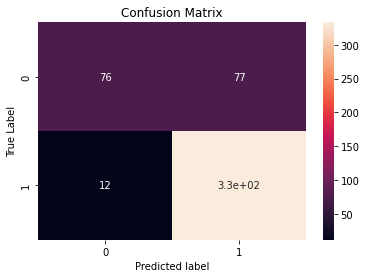

In [24]:
knn_predictions = confusion_matrix(y_train,knn_predictions)
sb.heatmap(knn_predictions,annot=True)
plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show

For now we have seen that KNN is a much better training method for the model of predicting the status loan. 

Now it is going to be performed the dimensional reduction and test the model again

In [25]:
from sklearn.decomposition import PCA 

pca = PCA()
pca.fit(X_train, y_train)
x_pca = pca.transform(X_test)

x_pca.shape

(56, 11)

In [26]:
#SVM 
from sklearn.svm import SVC
smv = SVC()
smv.fit(X_train, y_train)

predictions = smv.predict(X_test)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [27]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.37      0.54        19
           1       0.76      1.00      0.86        37

    accuracy                           0.79        56
   macro avg       0.88      0.68      0.70        56
weighted avg       0.84      0.79      0.75        56

[[ 7 12]
 [ 0 37]]


In [28]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_train)

print(classification_report(y_train, knn_predictions))
print(confusion_matrix(y_train,knn_predictions))

              precision    recall  f1-score   support

           0       0.86      0.50      0.63       153
           1       0.81      0.97      0.88       345

    accuracy                           0.82       498
   macro avg       0.84      0.73      0.76       498
weighted avg       0.83      0.82      0.80       498

[[ 76  77]
 [ 12 333]]


<function matplotlib.pyplot.show>

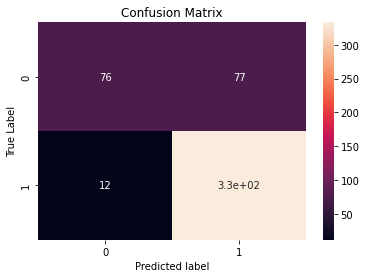

In [29]:
knn_predictions = confusion_matrix(y_train,knn_predictions)
sb.heatmap(knn_predictions,annot=True)
plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show

As we can see the evaluation of the reduction of dimensionality applying PCA, the model does not change in its accuracy. 